In [ ]:
!pip install keras-tuner

In [ ]:
'''


Create realistic simulated business data for classification, we can generate a dataset based on common business metrics. For this example, 
I'll simulate a dataset for customer segmentation based on behavior, where the goal is to classify customers into categories (e.g., "Low Value," "Medium Value," and "High Value") based on their spending patterns, engagement, and other relevant features.
 
Features for Business Dataset:
1.	Customer Spending (monthly): Average monthly spending.
2.	Engagement Score: Derived from the number of interactions with the business (e.g., website visits, email opens).
3.	Tenure (months): How long the customer has been with the business.
4.	Complaint Count: Number of complaints filed.
5.	Purchase Frequency: Average number of purchases per month.
6.	Discount Usage: Percentage of purchases using discounts.
 
Classification Target:
We categorize customers into three segments:
1.	Low Value (0): Low spending, low engagement, high complaints.
2.	Medium Value (1): Moderate spending and engagement, medium complaints.
3.	High Value (2): High spending and engagement, few or no complaints.

Summary of Simulated Dataset:
1.	Features:
o	Monthly Spending (float): Average monthly spending, normally distributed.
o	Engagement Score (int): Score based on customer interactions (1-100).
o	Tenure (int): Number of months the customer has been with the business.
o	Complaint Count (int): Number of complaints filed, based on a Poisson distribution.
o	Purchase Frequency (float): Average number of purchases per month (uniform distribution).
o	Discount Usage (float): Fraction of purchases with discounts (0 to 1).
2.	Target:
o	Customer Segment (int):
	0: Low Value
	1: Medium Value
	2: High Value

Note:
Key Changes for Speed:
1.	RandomSearch: Reduced the number of trials to 10.
2.	Reduced Epochs: Limited training to 20 epochs per trial during tuning.
3.	Subset Data: Used a smaller subset of the training data during tuning.



'''

In [ ]:
'''

Create realistic simulated business data for classification, we can generate a dataset based on common business metrics. For this example, I'll simulate a dataset for customer segmentation based on behavior, where the goal is to classify customers into categories (e.g., "Low Value," "Medium Value," and "High Value") based on their spending patterns, engagement, and other relevant features.
 
Features for Business Dataset:
1.	Customer Spending (monthly): Average monthly spending.
2.	Engagement Score: Derived from the number of interactions with the business (e.g., website visits, email opens).
3.	Tenure (months): How long the customer has been with the business.
4.	Complaint Count: Number of complaints filed.
5.	Purchase Frequency: Average number of purchases per month.
6.	Discount Usage: Percentage of purchases using discounts.
 
Classification Target:
We categorize customers into three segments:
1.	Low Value (0): Low spending, low engagement, high complaints.
2.	Medium Value (1): Moderate spending and engagement, medium complaints.
3.	High Value (2): High spending and engagement, few or no complaints.

Summary of Simulated Dataset:
1.	Features:
o	Monthly Spending (float): Average monthly spending, normally distributed.
o	Engagement Score (int): Score based on customer interactions (1-100).
o	Tenure (int): Number of months the customer has been with the business.
o	Complaint Count (int): Number of complaints filed, based on a Poisson distribution.
o	Purchase Frequency (float): Average number of purchases per month (uniform distribution).
o	Discount Usage (float): Fraction of purchases with discounts (0 to 1).
2.	Target:
o	Customer Segment (int):
	0: Low Value
	1: Medium Value
	2: High Value

Note:
Key Changes for Speed:
1.	RandomSearch: Reduced the number of trials to 10.
2.	Reduced Epochs: Limited training to 20 epochs per trial during tuning.
3.	Subset Data: Used a smaller subset of the training data during tuning.


Notes:
1.	Why Use TensorFlow/Keras?
o	TensorFlow handles low-level numerical computations efficiently on GPUs/CPUs.
o	Keras provides a user-friendly interface to define and train deep learning models.
2.	Model Components:
o	Dense Layer: Fully connected layer for learning complex relationships.
o	Dropout Layer: Prevents overfitting by randomly disabling neurons during training.
o	Softmax Activation: Converts raw outputs to probabilities for multi-class classification.
3.	Training Techniques:
o	Early Stopping: Avoids overfitting by stopping when validation performance stops improving.
o	SMOTE: Balances the dataset, ensuring the model learns minority class patterns.
4.	Evaluation Metrics:
o	Classification Report: Provides precision, recall, and F1-score for each class.
o	Confusion Matrix: Visualizes the model's performance across all classes.


'''

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train, validation, and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Feature scaling and one-hot encoding
from sklearn.metrics import classification_report, confusion_matrix  # Evaluating model performance
from imblearn.over_sampling import SMOTE  # Handling class imbalance
from tensorflow.keras.models import Sequential  # For creating neural networks
from tensorflow.keras.layers import Dense, Dropout  # For adding layers and dropout regularization
from tensorflow.keras.callbacks import EarlyStopping  # For implementing early stopping
import keras_tuner as kt  # For hyperparameter optimization

# Step 1: Simulate Customer Segmentation Dataset
# Explanation: Simulate a realistic dataset representing customer behavior.

# Number of samples
n_samples = 1500

# Simulate data with specific patterns for different features
np.random.seed(42)  # Ensures reproducibility of random numbers
data = pd.DataFrame({
    'Monthly Spending': np.random.normal(500, 100, n_samples),  # Normally distributed spending
    'Engagement Score': np.random.randint(1, 101, n_samples),  # Engagement as integers between 1 and 100
    'Tenure': np.random.randint(1, 60, n_samples),  # Customer tenure in months
    'Complaint Count': np.random.poisson(2, n_samples),  # Poisson distributed complaints
    'Purchase Frequency': np.random.uniform(0, 10, n_samples),  # Uniformly distributed purchases
    'Discount Usage': np.random.uniform(0, 1, n_samples)  # Discounts as fractions
})

# Define a function to categorize customers into segments
# Explanation: Assign customers to "High Value", "Medium Value", or "Low Value" based on rules.
def categorize_customer(row):
    if row['Monthly Spending'] > 600 and row['Engagement Score'] > 70 and row['Complaint Count'] < 2:
        return 2  # High Value
    elif 300 < row['Monthly Spending'] <= 600 and 40 <= row['Engagement Score'] <= 70:
        return 1  # Medium Value
    else:
        return 0  # Low Value

# Apply the categorization function to the dataset
data['Customer Segment'] = data.apply(categorize_customer, axis=1)

# Adjust the number of samples to ensure the required distribution
# Explanation: Ensure the exact distribution: 1067 "Low Value", 393 "Medium Value", and 100 "High Value".

# Handle "High Value" underrepresentation by sampling
class_2_data = data[data['Customer Segment'] == 2]
class_2_data = class_2_data.sample(100, replace=True, random_state=42)  # Ensuring 100 samples for class 2

# Handle Class 0 and Class 1 sampling
class_0_data = data[data['Customer Segment'] == 0].sample(1067, replace=False, random_state=42)  # 1067 samples for class 0
class_1_data = data[data['Customer Segment'] == 1].sample(393, replace=False, random_state=42)  # 393 samples for class 1

# Combine all classes into one dataset
data = pd.concat([class_0_data, class_1_data, class_2_data])

from google.colab import drive
drive.mount('/content/drive')

data.to_csv('/content/drive/MyDrive/dataset-imbalance2.csv', index=False)

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd

file_path = '/content/drive/MyDrive/dataset-imbalance2.csv'  # Corrected file name and path
data = pd.read_csv(file_path)

data.head()# View the first few rows of the dataset


Mounted at /content/drive
Mounted at /content/drive


,Monthly Spending,Engagement Score,Tenure,Complaint Count,Purchase Frequency,Discount Usage,Customer Segment
0,353.562512,75,1,2,8.317581,0.991893,0
1,570.835645,5,27,2,3.788871,0.481873,0
2,420.747926,19,4,0,7.462543,0.801747,0
3,400.946367,15,17,1,6.087980,0.410269,0
4,577.086519,88,30,0,4.246790,0.379631,0


Class Distribution Before Preprocessing:
Customer Segment
0    1067
1     393
2     100
Name: count, dtype: int64


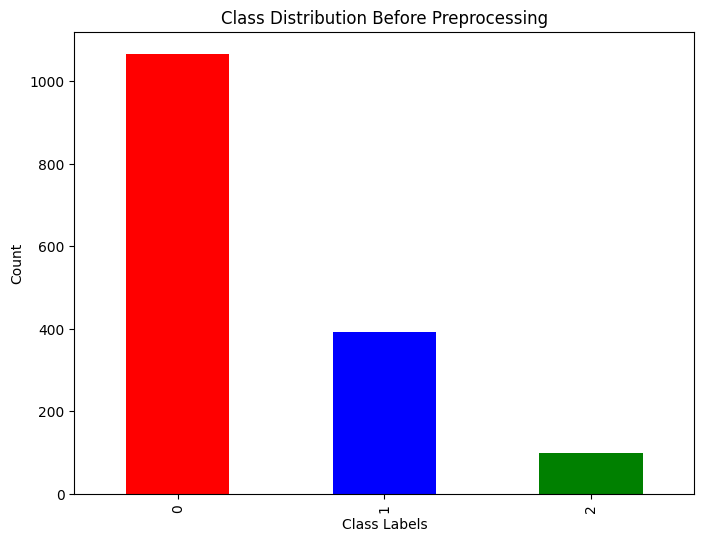

In [ ]:
# Display the class distribution before preprocessing
print("Class Distribution Before Preprocessing:")
print(data['Customer Segment'].value_counts())

# Plot the class distribution before preprocessing
plt.figure(figsize=(8, 6))
data['Customer Segment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Class Distribution Before Preprocessing")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

In [ ]:
# Step 2: Split the Data into Features and Target
# Explanation: Separate features (independent variables) and target (dependent variable).
X = data.drop('Customer Segment', axis=1)
y = data['Customer Segment']

# Step 3: Split the Data into Training, Validation, and Test Sets
# Explanation: Divide the data into 80% training and 20% testing. Use a part of the training data for validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)


'''
SMOTE (Synthetic Minority Oversampling Technique):
Purpose:

SMOTE is designed to address class imbalance by generating synthetic samples for the minority class. This helps to balance the dataset and improve the performance of machine learning models, especially for classification tasks where the class distribution is skewed.
How it Works:

SMOTE generates synthetic samples by interpolating between existing instances of the minority class. It selects two or more similar samples from the minority class and creates new data points along the line segments joining them.
Benefits:

Prevents the model from being biased toward the majority class.
Avoids simply duplicating samples, which can lead to overfitting.
Typical Use Case:

SMOTE is applied before training the model, often as part of a preprocessing pipeline.
Considerations:

SMOTE should be used only on the training dataset (not on the validation or test datasets) to avoid data leakage.
It can introduce noise if the minority class has significant overlap with the majority class or if there are outliers.

'''

'\nSMOTE (Synthetic Minority Oversampling Technique):\nPurpose:\n\nSMOTE is designed to address class imbalance by generating synthetic samples for the minority class. This helps to balance the dataset and improve the performance of machine learning models, especially for classification tasks where the class distribution is skewed.\nHow it Works:\n\nSMOTE generates synthetic samples by interpolating between existing instances of the minority class. It selects two or more similar samples from the minority class and creates new data points along the line segments joining them.\nBenefits:\n\nPrevents the model from being biased toward the majority class.\nAvoids simply duplicating samples, which can lead to overfitting.\nTypical Use Case:\n\nSMOTE is applied before training the model, often as part of a preprocessing pipeline.\nConsiderations:\n\nSMOTE should be used only on the training dataset (not on the validation or test datasets) to avoid data leakage.\nIt can introduce noise if the

Class Distribution After SMOTE:
Customer Segment
0    640
1    640
2    640
Name: count, dtype: int64


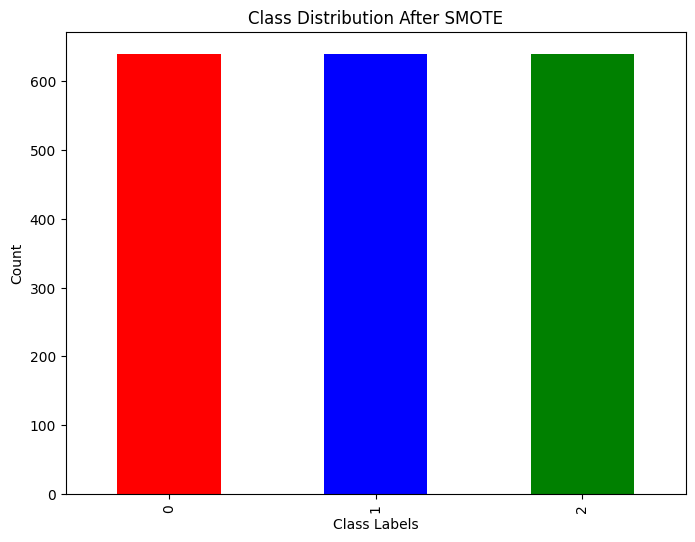

In [ ]:
# Step 4: Apply SMOTE to Handle Class Imbalance
# Explanation: SMOTE (Synthetic Minority Oversampling Technique) generates synthetic samples for underrepresented classes to balance the dataset.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Class Distribution After SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Plot the class distribution after SMOTE
plt.figure(figsize=(8, 6))
pd.Series(y_train_smote).value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

In [ ]:
# Step 5: Scale the Features
# Explanation: Scaling the features ensures that each feature has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 6: Encode the Target Variable
# Explanation: Convert the target variable into one-hot encoded format for multi-class classification.
encoder = OneHotEncoder(sparse_output=False)
y_train_smote = encoder.fit_transform(y_train_smote.values.reshape(-1, 1))
y_val = encoder.transform(y_val.values.reshape(-1, 1))
y_test = encoder.transform(y_test.values.reshape(-1, 1))

In [ ]:
# Step 7: Define the Neural Network Model and Hyperparameter Search
# Explanation: Use KerasTuner to optimize the neural network hyperparameters like the number of units, dropout rate, etc.

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_input', min_value=64, max_value=256, step=64),
        activation='relu', input_dim=X_train_smote.shape[1]
    ))
    model.add(Dropout(hp.Choice('dropout_input', values=[0.2, 0.3, 0.4])))
    for i in range(hp.Int('num_layers', 1, 4)):  # Now allowing up to 4 hidden layers
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        model.add(Dropout(hp.Choice(f'dropout_{i}', values=[0.2, 0.3, 0.4])))
    model.add(Dense(3, activation='softmax'))  # Output layer for multi-class classification
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 8: Hyperparameter Tuning with KerasTuner
# Explanation: Perform hyperparameter tuning to find the optimal configuration for the neural network.
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
  max_epochs  =100,  # Increase max_epochs to explore more possibilities
    factor=3,  # Control how aggressively the search narrows down the trials
    directory='hyperparam_tuning',
    project_name='customer_segmentation'
)

# Search for hyperparameters, training each trial for more epochs
tuner.search(
    X_train_smote, y_train_smote,
    validation_data=(X_val, y_val),
    epochs=30,  # Train each trial for up to 30 epochs to allow the model more time to learn
    batch_size=16,  # Smaller batch size for better gradient updates
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]  # Early stopping to avoid overfitting
)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Input Layer Units: {best_hps.get('units_input')}")
print(f"Number of Hidden Layers: {best_hps.get('num_layers')}")
print(f"Optimizer: {best_hps.get('optimizer')}")


Trial 254 Complete [00h 00m 17s]
val_accuracy: 0.9391025900840759

Best val_accuracy So Far: 0.9839743375778198
Total elapsed time: 00h 33m 44s
Best Hyperparameters:
Input Layer Units: 192
Number of Hidden Layers: 1
Optimizer: adam


In [ ]:
# Step 9: Build and Train the Final Model
# Explanation: Build the final model using the best hyperparameters and train it on the dataset.
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6302 - loss: 0.7943 - val_accuracy: 0.7147 - val_loss: 0.6275
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4267 - val_accuracy: 0.9167 - val_loss: 0.3704
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8948 - loss: 0.3073 - val_accuracy: 0.9199 - val_loss: 0.2647
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9155 - loss: 0.2352 - val_accuracy: 0.9167 - val_loss: 0.2251
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9201 - loss: 0.2210 - val_accuracy: 0.9487 - val_loss: 0.1889
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9400 - loss: 0.1836 - val_accuracy: 0.9359 - val_loss: 0.1763
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.1554 - val_accuracy: 0.9487 - val_loss: 0.1496
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9512 - loss: 0.1359 - val_accuracy: 0.9455 - val_loss:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0783 
Test Loss: 0.08516910672187805
Test Accuracy: 0.9615384340286255
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report:
              precision    recall  f1-score     support
0              0.990244  0.953052  0.971292  213.000000
1              0.905882  0.974684  0.939024   79.000000
2              0.909091  1.000000  0.952381   20.000000
accuracy       0.961538  0.961538  0.961538    0.961538
macro avg      0.935072  0.975912  0.954232  312.000000
weighted avg   0.963681  0.961538  0.961909  312.000000


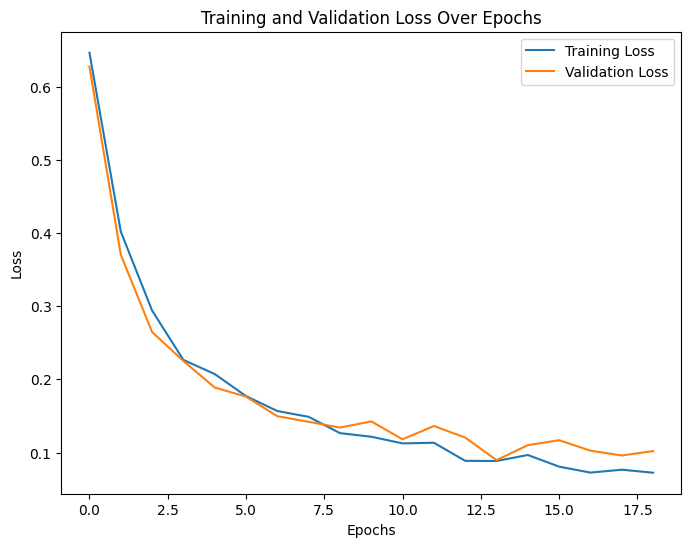

In [ ]:

# Step 10: Evaluate the Model
# Explanation: Test the final model on the test set to evaluate its performance.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Generate predictions and classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Display Classification Report
report_df = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).transpose()
print("Classification Report:")
print(report_df)

# Step 11: Plot Training and Validation Loss
# Explanation: Visualize the training and validation loss over epochs to understand model performance.
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


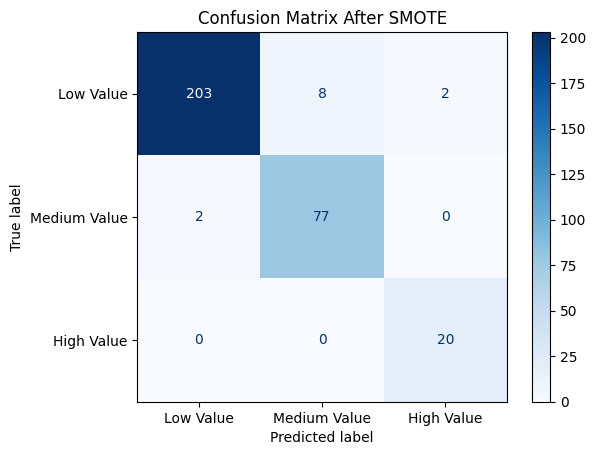

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute Confusion Matrix
y_test_classes = np.argmax(y_test, axis=1)  # True labels
y_pred_classes = np.argmax(model.predict(X_test), axis=1)  # Predicted labels

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Low Value', 'Medium Value', 'High Value'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix After SMOTE")
plt.show()


In [ ]:
'''

1. Class Distribution Before and After SMOTE
Before Preprocessing:
•	Class 0 (Low Value): 1067 samples (dominant class).
•	Class 1 (Medium Value): 393 samples (moderate class).
•	Class 2 (High Value): 100 samples (minority class).
This highlights a significant class imbalance where the model would naturally be biased toward the dominant class (Class 0) if trained directly on this data. 
The imbalance could lead to poor performance on the minority classes (Class 1 and Class 2).
After Applying SMOTE:
•	Class 0, 1, 2: All have 640 samples each.
SMOTE (Synthetic Minority Oversampling Technique) addresses this class imbalance by oversampling the minority classes (1 and 2) to match the majority class (0). 
This ensures the model gets a balanced view of all classes, reducing bias toward any single class.
 
2. Hyperparameter Tuning Results
•	Trial 254 achieved a validation accuracy of 93.91%, which is a strong result during tuning.
•	Best Validation Accuracy: 98.39%. This is the highest performance achieved during the trials.
•	Optimal Hyperparameters:
o	Input Layer Units: 192 neurons.
o	Number of Hidden Layers: 1 (simple architecture).
o	Optimizer: Adam.
The tuning results suggest that a relatively simple architecture with 1 hidden layer and 192 neurons works best for this dataset, likely because SMOTE ensured balanced data, reducing the need for a complex model.
 
3. Training and Validation Progress
Epoch-by-Epoch Observations:
•	Epoch 1:
o	Training accuracy starts low (63.02%) due to random initialization and learning.
o	Validation accuracy: 71.47%. The model begins to generalize.
•	Epochs 2-5: Rapid improvement as the loss decreases significantly:
o	Training accuracy improves to 92.01% by Epoch 5.
o	Validation accuracy reaches 94.87%, indicating good generalization.
•	Epochs 6-10: Consistent improvement:
o	Training and validation accuracies continue rising, with validation accuracy peaking at 95.51%.
•	Epochs 14-19:
o	Final validation accuracy stabilizes at 96.79%.
o	Loss values decrease for both training and validation, demonstrating effective learning without overfitting.
Key Insights:
•	The model quickly converges to high accuracy (above 95%) within 15 epochs.
•	No evidence of overfitting, as validation loss aligns closely with training loss throughout.
 
4. Test Performance
•	Test Accuracy: 96.15%.
•	Test Loss: 0.085.
This indicates the model performs consistently well on unseen test data, achieving high accuracy and a low loss value. 
The strong test performance reflects the effectiveness of SMOTE and the tuned model.
 
5. Classification Report
Key Metrics:
1.	Precision: Measures the proportion of correctly identified instances for each class.
o	Class 0: (Very high).
o	Class 1: (Strong for the medium value class).
o	Class 2: (Good for the minority class).
2.	Recall: Measures how well the model captures all relevant instances for each class.
o	Class 0: (High, slightly misses some instances).
o	Class 1: 9(Excellent).
o	Class 2:  (All instances of the minority class are identified).
3.	F1-Score: Harmonic mean of precision and recall.
o	Class 0: (Very high).
o	Class 1: (Balanced performance).
o	Class 2: (Strong performance for the minority class).
4.	Overall Accuracy: 96.15% (Excellent performance across all classes).
5.	Macro Average: (Unweighted average across all classes).
6.	Weighted Average: (Takes class imbalance into account).
Key Insights:
•	The model performs exceptionally well across all classes, including the minority class (Class 2).
•	High recall for Class 2 suggests SMOTE effectively helped the model generalize well on the minority class.


'''